In [2]:
!pip install soundfile numpy matplotlib librosa

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 6.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [24]:
def mu_law_encoding(audio):
    mu = 255 # number of bins at the end which we will sort the audio into. This is a hyperparameter
    
    normalized_audio = audio / np.max(np.abs(audio)) # normalizing the audio to lie in [-1, 1]
    
    safe_audio = np.clip(audio, -1, 1) # due to rounding errors, there could still be audio not in [-1, 1] after normalization

    new_signal = np.sign(audio) * (np.log(1+mu*np.abs(audio))) / (np.log(1 + mu))

    # note that casting as an integer is the same as math.floor() for positive values
    quantized = ( ((new_signal+1)/2)*mu + 0.5).astype(np.int32)

    return quantized

audio_data, sample_rate = librosa.load("violin.mp3", sr=16000) # we want a sampling rate of 16kHz

time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

encoded_audio = mu_law_encoding(audio_data)

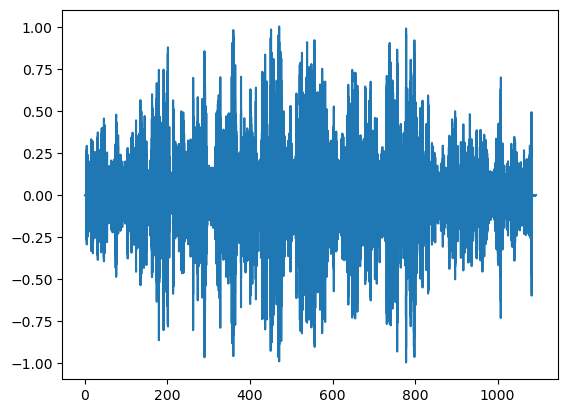

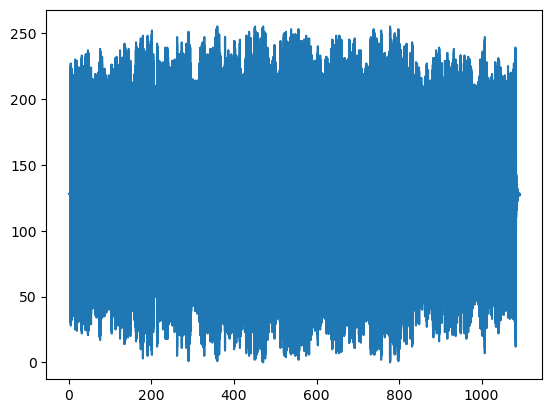

In [25]:
# visualizing the mu-law encoding
plt.subplots()
plt.plot(time, audio_data)

plt.figure()
plt.plot(time, encoded_audio)